# Feature Extraction

Flow aggregation by a time window

Generated features:
* NumSrcPorts
* NumDestAddr
* NumDestPorts
* NumFlows
* NumBytesSum
* NumBytesMean
* NumBytesVar
* NumPacketsSum
* NumPacketsMean
* NumPacketsVar

## Imports

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime
import os
import glob
import time

import warnings

import matplotlib.pyplot as plt
import itertools

import pickle

warnings.filterwarnings("ignore")

## Functions

In [4]:
features = ["NumSrcPorts", "NumDestAddr", "NumDestPorts", "NumFlows",
                   "NumBytesSum", "NumBytesMean", "NumBytesVar",
                   "NumPacketsSum", "NumPacketsMean", "NumPacketsVar"]

def load_pickle_data(scenario = -1):
    if scenario == -1:
        p_filename = "botnet_cache/botnet_feat_list.p"
    else:
        p_filename = "botnet_cache/botnet_scenario_features_"+str(scenario)+".p"
        
    return pickle.load(open(p_filename, "rb" ) )

## Extract Features

In [5]:
feat_list = load_pickle_data()
gen_feat_df = pd.concat(feat_list)
gen_feat_df.reset_index(drop=True, inplace=True)
gen_feat_s_df = pd.concat([gen_feat_df, pd.get_dummies(gen_feat_df['Scenario'])],axis=1)
gen_feat_s_df[features[:4]] = gen_feat_s_df[features[:4]].astype(int)
gen_feat_s_df[features[4:]] = gen_feat_s_df[features[4:]].astype(float)
gen_feat_s_df.head()

,NumSrcPorts,NumDestAddr,NumDestPorts,NumFlows,NumBytesSum,NumBytesMean,NumBytesVar,NumPacketsSum,NumPacketsMean,NumPacketsVar,...,4,5,6,7,8,9,10,11,12,13
0,2,2,2,3,780.0,260.000000,6.816867e+04,11.0,3.666667,5.555556,...,0,0,0,0,0,0,0,0,0,0
1,10,7,6,18,15072.0,837.333333,1.075430e+06,510.0,28.333333,1910.444444,...,0,0,0,0,0,0,0,0,0,0
2,22,18,6,24,20881.0,870.041667,3.699151e+06,659.0,27.458333,6182.414931,...,0,0,0,0,0,0,0,0,0,0
3,13,13,4,13,2771.0,213.153846,1.712798e+04,47.0,3.615385,3.159763,...,0,0,0,0,0,0,0,0,0,0
4,16,15,4,16,7261.0,453.812500,6.050515e+05,183.0,11.437500,865.246094,...,0,0,0,0,0,0,0,0,0,0


## Visualization

In [6]:
#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn

color = sns.color_palette()
sns.set_style("dark")
%matplotlib inline

In [66]:
means_vars = []
for i in range(1,14):
    means_vars.append(gen_feat_s_df[gen_feat_s_df['Scenario'] == i].describe().loc[['mean', 'std']])

means_vars_df = pd.concat(means_vars)

#Normalize for better plots
means_vars_df.loc['mean'] = means_vars_df.loc['mean']/means_vars_df.loc['mean'].max()
means_vars_df.loc['std'] = means_vars_df.loc['std']/means_vars_df.loc['std'].max()

means_vars_df

,NumSrcPorts,NumDestAddr,NumDestPorts,NumFlows,NumBytesSum,NumBytesMean,NumBytesVar,NumPacketsSum,NumPacketsMean,NumPacketsVar,...,4,5,6,7,8,9,10,11,12,13
mean,0.041168,1.000000,0.133032,0.132282,0.004441,0.000156,2.493472e-05,0.056234,0.001806,1.667632e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.006550,0.993765,0.017588,0.111651,0.002816,0.000091,9.636663e-06,0.037454,0.001574,1.364022e-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.098508,0.702290,0.141871,0.099752,0.006012,0.000171,1.892620e-05,0.073041,0.001832,1.326319e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.114873,0.160594,0.018738,0.116393,0.002935,0.000060,6.880797e-06,0.048286,0.000948,9.837378e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.029116,0.477665,0.028165,0.027427,0.000521,0.000077,1.130368e-10,0.008345,0.001271,4.546589e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.004434,0.131183,0.002028,0.004481,0.000045,0.000040,1.589560e-10,0.001032,0.000743,2.768499e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.025892,0.231190,0.090715,0.032773,0.061160,0.019625,1.000000e+00,0.048978,0.013554,1.000000e+00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.014686,0.227306,0.050228,0.013653,0.184885,0.048395,1.000000e+00,0.116477,0.029749,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.045717,0.286141,0.127237,0.044145,0.046682,0.002001,6.566971e-04,0.132613,0.005749,2.553990e-03,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.012372,0.113816,0.018771,0.012517,0.020508,0.000603,1.393394e-04,0.041157,0.001120,4.968629e-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


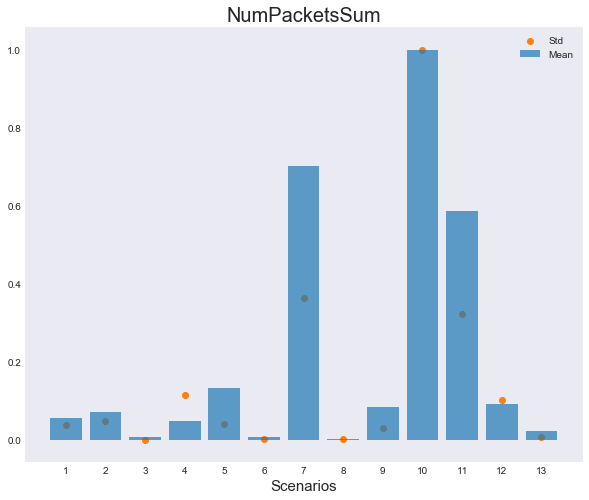

In [69]:
plt.figure(figsize=(10,8))
ftr = "NumPacketsSum"
plt.title(ftr, fontsize=20)
plt.bar(range(1,14), means_vars_df.loc['mean'][ftr], alpha=0.7, label='Mean')
plt.scatter(range(1,14), means_vars_df.loc['std'][ftr], label='Std')
plt.xticks(range(1,14))
plt.xlabel("Scenarios", fontsize=15)
plt.legend()
plt.savefig(ftr+".png")
plt.show()